In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import scipy

In [2]:
album_classes = ["No gingivitis", "Gingivitis Lv.1", "Gingivitis Lv.2-3"]
num_classes = len(album_classes)
IMAGE_SIZE = 224

In [3]:
X_test_norm = np.load('./X_test_norm.npy')
y_test = np.load('./y_test.npy')

In [4]:
X_test_norm.shape

(44, 224, 224, 3)

In [5]:
generator = keras.preprocessing.image.ImageDataGenerator()
test_iter = generator.flow(x=X_test_norm, y=y_test)

In [6]:
X_test_norm.shape

(44, 224, 224, 3)

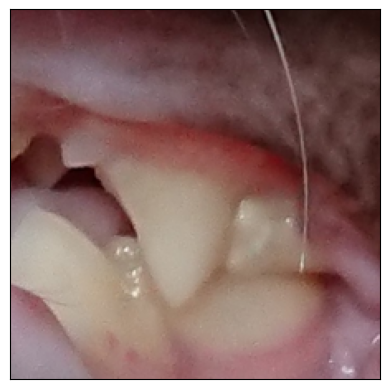

1/1 [==============================] - 2s 2s/step
[[0.30001712 0.5395729  0.16040997]]
正解: Gingivitis Lv.1 予測結果: Gingivitis Lv.1


In [9]:
images, labels = next(test_iter)  # サンプルを1つだけ取り出す
plt.imshow((np.array(images[0])))  # チャンネルを一番後ろに
plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)  # ラベルとメモリを非表示に
plt.show()

image = tf.reshape(images[0], [1, 224, 224, 3])
new_model = tf.keras.models.load_model('./my_model_EN_adam.h5')
pred = new_model.predict(image)
print(pred)
print("正解:", album_classes[np.argmax(labels[0])],
      "予測結果:", album_classes[np.argmax(pred)])